# Lab 3: Genome-Wide Association Studies

### Name: Hyun Do Jung (hjung35)

### Due December 2, 2020 11:59 PM

#### Preamble (Don't change this)

In [1]:
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm 
import numpy as np

## GWAS from dogs genotype data

In this lab, you will perform GWAS on genotype data from dogs.
The binary phenotype considered will be "yellow fur color".
Hence, we will be trying to identify SNPs in a dog genome that are associated with yellow fur.

You will work with the file dog_genotype.vcf.
The first few lines of the file start with ``##`` and can be ignored, as they contain general information about the file.
The header line starts with ``#`` and contains the names of each of the columns in the matrix.
All the remaining lines correspond to the data about a specific SNP.

Notice that the columns are separated by tab ("\t").

In [2]:
initial_lines=[]
header_line=""
snp_lines=[]

for cur_line in open("dog_genotype.vcf","r"):
    if cur_line[:2] == "##":
        initial_lines.append(cur_line)
    elif cur_line[:1] == "#":
        header_line = cur_line
    else:
        snp_lines.append(cur_line)

In [3]:
print(header_line)

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	dark_13	dark_23	dark_21	yellow_5	yellow_6	dark_1	dark_7	dark_9	dark_2	dark_10	dark_8	yellow_24	yellow_22	dark_17	dark_18	dark_4	dark_6	dark_5	yellow_16	yellow_14	yellow_18	yellow_15	yellow_13	yellow_17	yellow_12	yellow_10	yellow_11	dark_11	dark_19	dark_20	dark_12	dark_3	dark_28	dark_25	dark_26	dark_29	dark_27	yellow_8	yellow_1	yellow_3	dark_14	dark_15	yellow_7	yellow_2	dark_22	yellow_4	yellow_9	yellow_31	dark_24	dark_31	yellow_23	yellow_20	yellow_21



As you can see above, the header line contains SNP information such as chromosome, position,  SNP id, REF, and ALT.

The columns dark_13 until yellow_21 represent 53 dogs. Their ids encode whether they have yellow or dark fur (coat).

In [4]:
for line in snp_lines[:3]:
    print(line)

1	5123496	chr1:5123496	T	C	.	.	PR	GT	0/0	0/1	0/0	0/0	0/0	1/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/0	0/0	1/1	0/0	0/0	0/0	0/0

1	9239488	chr1:9239488	G	A	.	.	PR	GT	0/0	./.	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	1/1	./.	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/0	0/0	0/0	0/1	0/0	1/1	1/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/0	0/0	0/0	0/0

1	10894485	rs22000016,BICF2S24323938	A	T	.	.	PR	GT	0/0	0/0	0/0	0/0	1/1	1/1	0/1	0/0	./.	0/0	0/0	0/0	0/0	0/1	0/1	0/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/0	0/1	0/1	0/0	1/1	0/0	0/1	0/0	0/1	0/1	1/1	0/0	0/0	0/0	0/0	0/0	0/0	0/0	1/1	./.	0/0	0/0	0/1	0/0	1/1	0/0	0/0	0/1	0/0



Notice that the genotypes are encoded as x/y, where x and y are in {0,1,.}. The '.' represents a genotype that is not known.

## Graded Function 1 : create_data() (10 marks)

Pupose - To prepare data for association analysis. We will prepare a dataframe which has 53 rows (one for each dog) and 3902 columns (one for each SNP).
The name of each column should encode the chromosome number and the position as 1:5123496 for chromosome 1 and position 5123496 (from the first and second columns).

You will begin by iterating through each of the snp_lines list created above. 
You will process all genotype columns (starting from the 10th column) and convert the "x/y" genotype to x+y (total number of ALT).

Genotypes containing a '.' should be converted into a ``np.nan``. These values will be ignored later.

Output - You should return the 53 x 3902 dataframe.

In [5]:
def create_data() :
    
    df=pd.DataFrame()
    
    #start code here
    for t_snp in snp_lines:
        parts = t_snp.split('\t')
        col_name = parts[0]+ ':' + parts[1]
        num_list = []
        for part in parts:
            if '/' in part:
                a, b = part.strip().split('/')
                if a.isdigit() and b.isdigit():
                    num_list.append(np.int(a)+np.int(b))
                else:
                    num_list.append(np.nan)
        df[col_name] = num_list
    #end code here

    return df

In [6]:
snp_data=create_data()

In [7]:
# you can visualize the first 5 rows of a pandas dataframe as follows:
snp_data.head()

,1:5123496,1:9239488,1:10894485,1:11798310,1:13061546,1:13469023,1:14254129,1:15732153,1:17432669,1:17794285,...,39:113786979,39:115191272,39:115607474,39:115954242,39:116294011,39:118625882,39:121038139,39:122458103,39:122478098,39:123278777
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,1,NaN,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,NaN,0
3,0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,1,0.0,0.0,0
4,0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0,0.0,0.0,0


In [8]:
print(snp_data["1:5123496"][:10].values)
print(snp_data.shape)

[0 1 0 0 0 2 0 0 0 0]
(53, 3902)


## Expected Output - 

[0 1 0 0 0 2 0 0 0 0]

(53, 3902)

## Graded Function 2 : create_target() (10 marks)

Purpose - To parse the header line and create a list of phenotype labels for the 53 dogs. We will represent yellow fur by 1 and dark fur by 0.

You should parse the header line (tab-delimited) and from the 10th element, assign 1 if yellow appears in name and 0 if dark appears in name.

In [9]:
def create_target(header_line) :
    #start code here
    
    # COLLECTING SPECY NAMES 
    color_headers = []
    splited_headers = header_line.split('\t')

    for name in splited_headers:
        if name.isupper() or name =='#CHROM' : 
            continue
        else:
            #print("Current Name: ", name)
            if 'yellow' in name:
                color_headers.append(1)
            elif 'dark': 
                color_headers.append(0)
            #print(color_headers)
    return color_headers      

    #end code here

In [10]:
target=create_target(header_line)
print(target[:10])
print(len([i for i in target if i==0]))
print(len([i for i in target if i==1]))

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
29
24


## Expected Output - 

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

29

24

We will now add the target to the snp_data dataframe under the name "yellow"

In [11]:
snp_data["target"]=target

## Graded Function 3 : logistic_reg_per_snp(df)  (10 marks)

Purpose - To iterate through all SNPs and fit a logistic regression model for each SNP. 

We will use the Logit class of statsmodels.api to create the logistic regression models.
The advantage of statsmodels' version of Logistic Regression is that it returns a p-value (unlike the scikit-learn version).

The input for the model will be the dataframe column for a particular SNP and the target variable will be the target column with fur color information. 

<!-- You should not include values in the input column which are less than 0. -->

You should add a constant column to the input column. You can do that using sm.add_constant() function. 
This will guarantee that a constant $\beta_0$
Please see documentation for more information:

(https://www.statsmodels.org/stable/api.html)

(https://tedboy.github.io/statsmodels_doc/generated/generated/statsmodels.api.Logit.html)

Please use the method='bfgs' in the fit method of the Logit object you will create.

The output should be list of 3902 pvalues and a list of 3902 beta values.

In [12]:
def logistic_reg_per_snp(df) :
    '''
    Input - snp_data dataframe
    Output - list of pvalues and list of betavalues
    '''
    #start code here
    
    # result lists to return 
    l_pvalues = []
    l_betavalues = []    
    
    for column in df.columns[:]:
        
        x_col = df[column]
        Xtrain = sm.add_constant(x_col)
        Ytrain = df["target"]
        temp_result = sm.Logit(Ytrain, Xtrain, missing='drop').fit(method='bfgs')   
        #temp_result.summary()
        #print(temp_result.params.values[1])
        l_pvalues.append(temp_result.pvalues[1])
        l_betavalues.append(temp_result.params.values[1])
    
    
    #eliminate target column
    l_pvalues.pop()
    l_betavalues.pop()
    #print(len(l_pvalues))
    #print(len(l_betavalues))
    
    return l_pvalues, l_betavalues
    #end code here

In [13]:
p_values,betavalues=logistic_reg_per_snp(snp_data)

Optimization terminated successfully.
         Current function value: 0.683264
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.675603
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.679092
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.676591
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.678240
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.648973
         Iterations: 12
         Function evaluations: 13
         Gr

Optimization terminated successfully.
         Current function value: 0.680429
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.630836
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.686591
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.685485
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.673589
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.685780
         Iterations: 10
         Function evaluations: 11
         

Optimization terminated successfully.
         Current function value: 0.599043
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.627205
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.688466
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.685594
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.646842
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.627756
         Iterations: 28
         Function evaluations: 29
   

Optimization terminated successfully.
         Current function value: 0.662885
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.599625
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.673562
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.687866
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.670254
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.686115
         Iterations: 8
         Function evaluations: 9
    

Optimization terminated successfully.
         Current function value: 0.676747
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.680108
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.664441
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.688646
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.684620
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.682672
         Iterations: 11
         Function evaluations: 12
         

Optimization terminated successfully.
         Current function value: 0.687324
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.650640
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.685902
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.679309
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.674279
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.588262
         Iterations: 10
         Function evaluations: 11
         

Optimization terminated successfully.
         Current function value: 0.672556
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.686847
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.612332
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.676819
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.668004
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.654864
         Iterations: 10
         Function evaluations: 11
       

Optimization terminated successfully.
         Current function value: 0.686576
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.664938
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.552320
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.651192
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.677725
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.684928
         Iterations: 12
         Function evaluations: 13
       

Optimization terminated successfully.
         Current function value: 0.667424
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.682851
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.688090
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.665484
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.684956
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.683647
         Iterations: 8
         Function evaluations: 9
         Gr

Optimization terminated successfully.
         Current function value: 0.689332
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.671857
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.553569
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.635737
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.584970
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.586258
         Iterations: 10
         Function evaluations: 11
   

Optimization terminated successfully.
         Current function value: 0.626313
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.583000
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.623908
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.626294
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.686095
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.648988
         Iterations: 10
         Function evaluations: 11
   

Optimization terminated successfully.
         Current function value: 0.691077
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.684540
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.688625
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.685449
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.668616
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.681221
         Iterations: 9
         Function evaluations: 10
         G

Optimization terminated successfully.
         Current function value: 0.667843
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.687083
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.672736
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.619766
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.678065
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.689798
         Iterations: 10
         Function evaluations: 11
  

Optimization terminated successfully.
         Current function value: 0.638574
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.607957
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.688174
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.600779
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.599625
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.607319
         Iterations: 10
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.643414
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.667881
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.683352
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.656109
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.642958
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.675519
         Iterations: 12
         Function evaluations: 13
      

Optimization terminated successfully.
         Current function value: 0.677530
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.606659
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.683378
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.690569
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.672799
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.661120
         Iterations: 9
         Function evaluations: 10
         

Optimization terminated successfully.
         Current function value: 0.619127
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.679729
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.680890
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.625192
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.638246
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.625192
         Iterations: 25
         Function evaluations: 26
         

Optimization terminated successfully.
         Current function value: 0.686919
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.683813
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.561050
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.597961
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.685080
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.662062
         Iterations: 9
         Function evaluations: 10
       

Optimization terminated successfully.
         Current function value: 0.688365
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.592510
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.563183
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.590862
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.668581
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.590639
         Iterations: 10
         Function evaluations: 11
    

Optimization terminated successfully.
         Current function value: 0.681586
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.676918
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.664075
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.679796
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.663359
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.571165
         Iterations: 29
         Function evaluations: 30
       

Optimization terminated successfully.
         Current function value: 0.605030
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.690007
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.688212
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.683568
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.677745
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.652839
         Iterations: 10
         Function evaluations: 11
         Grad

Optimization terminated successfully.
         Current function value: 0.571723
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.687994
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.657622
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.681805
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.624339
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.672148
         Iterations: 12
         Function evaluations: 13
        

Optimization terminated successfully.
         Current function value: 0.674861
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.596244
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.688816
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.633423
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.649677
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.686919
         Iterations: 10
         Function evaluations: 11
      

Optimization terminated successfully.
         Current function value: 0.674660
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.690062
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.687913
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.437758
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.680979
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.690164
         Iterations: 7
         Function evaluations: 9
         

Optimization terminated successfully.
         Current function value: 0.671915
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.665362
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.635849
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.676864
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.684004
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.690154
         Iterations: 8
         Function evaluations: 9
     

Optimization terminated successfully.
         Current function value: 0.688333
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.685594
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.609638
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.634413
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.560748
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.647194
         Iterations: 10
         Function evaluations: 11
      

Optimization terminated successfully.
         Current function value: 0.639873
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.680298
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.689844
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.689769
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.684126
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.667763
         Iterations: 8
         Function evaluations: 9
     

Optimization terminated successfully.
         Current function value: 0.682796
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.689496
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.676461
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.490281
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.682586
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.614478
         Iterations: 21
         Function evaluations: 22
    

Optimization terminated successfully.
         Current function value: 0.657658
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.664320
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.681396
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.684917
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.689707
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.688212
         Iterations: 8
         Function evaluations: 10
       

Optimization terminated successfully.
         Current function value: 0.689929
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.685840
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.688122
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.687913
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.681515
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.686462
         Iterations: 8
         Function evaluations: 9
         Gr

Optimization terminated successfully.
         Current function value: 0.672271
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.617553
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.663359
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.667008
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.585946
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.679541
         Iterations: 5
         Function evaluations: 7
     

Optimization terminated successfully.
         Current function value: 0.669594
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.682262
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.664038
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.684635
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.671441
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.669428
         Iterations: 11
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.691289
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.607319
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.649750
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.683275
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.685256
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.676255
         Iterations: 11
         Function evaluations: 12
        

Optimization terminated successfully.
         Current function value: 0.613169
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.668018
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.686196
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.665472
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.614858
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.682623
         Iterations: 8
         Function evaluations: 9
       

Optimization terminated successfully.
         Current function value: 0.662733
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.626294
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.689905
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.686077
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.672131
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.681336
         Iterations: 8
         Function evaluations: 9
       

Optimization terminated successfully.
         Current function value: 0.678065
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.567576
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.655867
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.611383
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.554170
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.658507
         Iterations: 10
         Function evaluations: 11
  

Optimization terminated successfully.
         Current function value: 0.629604
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.681586
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.658281
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.686195
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.686431
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.607271
         Iterations: 10
         Function evaluations: 11
     

Optimization terminated successfully.
         Current function value: 0.684522
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.681873
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.667353
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.611383
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.671883
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.642214
         Iterations: 12
         Function evaluations: 13
   

Optimization terminated successfully.
         Current function value: 0.601807
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.685167
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.508677
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.687915
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.683369
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.680983
         Iterations: 6
         Function evaluations: 8
     

Optimization terminated successfully.
         Current function value: 0.678956
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.687856
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.611384
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.684057
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.661191
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.661191
         Iterations: 11
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.654776
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.686956
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.628016
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.668062
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.687973
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.626294
         Iterations: 29
         Function evaluations: 30
        

Optimization terminated successfully.
         Current function value: 0.601502
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.676979
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.654776
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.688142
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.686822
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.667653
         Iterations: 10
         Function evaluations: 11
         

Optimization terminated successfully.
         Current function value: 0.684073
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.660986
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.672070
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.654721
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.595874
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.672920
         Iterations: 8
         Function evaluations: 9
         

Optimization terminated successfully.
         Current function value: 0.686465
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.680991
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.674584
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.676223
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.691225
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.688056
         Iterations: 8
         Function evaluations: 9
      

Optimization terminated successfully.
         Current function value: 0.606193
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.678925
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.655201
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.634920
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.671080
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.685860
         Iterations: 8
         Function evaluations: 9
      

Optimization terminated successfully.
         Current function value: 0.680520
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.651553
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.674814
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.682651
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.658655
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.652280
         Iterations: 12
         Function evaluations: 13
      

Optimization terminated successfully.
         Current function value: 0.675505
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.690164
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.680765
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.467660
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.521793
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.599625
         Iterations: 25
         Function evaluations: 26
         

Optimization terminated successfully.
         Current function value: 0.683678
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.688647
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.593218
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.665204
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.661084
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.687689
         Iterations: 10
         Function evaluations: 11
         

Optimization terminated successfully.
         Current function value: 0.681900
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.682070
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.689848
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.600779
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 0.542841
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.620447
         Iterations: 9
         Function evaluations: 11
      

Optimization terminated successfully.
         Current function value: 0.680429
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.594439
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.650807
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.612332
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.686861
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.650105
         Iterations: 9
         Function evaluations: 10
       

Optimization terminated successfully.
         Current function value: 0.683264
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.664961
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.661422
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.643619
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.669466
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.672706
         Iterations: 11
         Function evaluations: 12
    

Optimization terminated successfully.
         Current function value: 0.680003
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.649325
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.688184
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.664320
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 0.638063
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.640642
         Iterations: 28
         Function evaluations: 29
    

Optimization terminated successfully.
         Current function value: 0.674289
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.663444
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.676508
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.676916
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.667881
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.676718
         Iterations: 11
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.689358
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.687054
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.687262
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.676629
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.577703
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.683938
         Iterations: 9
         Function evaluations: 10
         G

Optimization terminated successfully.
         Current function value: 0.597118
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.607957
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.624339
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.668458
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.686361
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.550299
         Iterations: 12
         Function evaluations: 13
   

Optimization terminated successfully.
         Current function value: 0.624339
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.673059
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.639027
         Iterations: 28
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.449306
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.686474
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.657474
         Iterations: 9
         Function evaluations: 10
     

Optimization terminated successfully.
         Current function value: 0.640642
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.687787
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.612332
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.670254
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.687902
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.658447
         Iterations: 10
         Function evaluations: 11
      

Optimization terminated successfully.
         Current function value: 0.675187
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.590164
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.682751
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.590164
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.685753
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.649499
         Iterations: 8
         Function evaluations: 10
    

Optimization terminated successfully.
         Current function value: 0.675782
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.607957
         Iterations: 26
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.678155
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.682535
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.689769
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.681477
         Iterations: 10
         Function evaluations: 11
   

Optimization terminated successfully.
         Current function value: 0.599625
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.601513
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.682609
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.686956
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.684189
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.663299
         Iterations: 11
         Function evaluations: 12
     

Optimization terminated successfully.
         Current function value: 0.682586
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.682586
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.675082
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.672629
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.643811
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.649325
         Iterations: 12
         Function evaluations: 13
       

Optimization terminated successfully.
         Current function value: 0.656936
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.682993
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.658213
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.681477
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.660293
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.662326
         Iterations: 10
         Function evaluations: 11
      

In [14]:
print(p_values[:10])
print(betavalues[:10])

[0.47116399109820917, 0.2505468244778053, 0.3414858530496554, 0.3141826785341525, 0.2556964211334197, 0.12005534283003777, 0.965506993652144, 0.8641002969846858, 0.8641002969846856, 0.1438093772602709]
[-0.511094968042328, -0.7751122104100252, -0.4036462052907773, 0.3943722901009065, 0.5255291657205076, -1.602617334389753, 0.01903492589874923, 0.12673524363973954, 0.1267352436397397, 0.9682750908995525]


## Expected Output - 

[0.47116399109820917, 0.2505468244778053, 0.3414858530496554, 0.3141826785341525, 0.2556964211334197, 0.12005534283003777, 0.965506993652144, 0.8641002969846858, 0.8641002969846856, 0.1438093772602709]

[-0.511094968042328, -0.7751122104100252, -0.4036462052907773, 0.3943722901009065, 0.5255291657205076, -1.602617334389753, 0.01903492589874923, 0.12673524363973954, 0.1267352436397397, 0.9682750908995525]

In [15]:
# You may also want to look at some crosstabs between a SNP and the target phenotype
# For example, let's take the beta with the largest absolute

betamax = np.argmax(np.abs(betavalues))
pd.crosstab(snp_data[snp_data.columns[betamax]],snp_data['target'])

target,0,1
22:55322251,,
0.0,29,14
1.0,0,6
2.0,0,3


We see that for SNP 22:55322251, every single dog in our dataset that has one or two ALT variants, has yellow fur.

## Graded Function 4 : get_top_snps() (10 marks)

Purpose - To identify the 5 SNPs whose association with dog color has the highest stastical significance. 

Statistical significance is determined in terms of p-values computed above.
The lower the p-value, the more significant the association is.

Output - list of 5 tuples, each with chromosome and position

In [16]:
def get_top_snps(snp_data) :
    #start code here
    pval_dict = {}
    top_five_pval = []
    top_snps = []

    #print(p_values, end='\n\n')


    for idx in range(0, len(p_values)):
        pval_dict.setdefault(idx, p_values[idx])

    #print(pval_dict)

    sorted_dict = {idx: pval_dict[idx] for idx in sorted(pval_dict, key=pval_dict.get)} 
    #print(sorted_dict, end='\n\n')


    # get five indices of top 5 significant pvalues computed
    idx = 0
    for idx in range(0, 5):
        top_five_pval.append(list(sorted_dict.keys())[idx])

    #print(top_five_pval, end='\n\n')

    for idx in top_five_pval:
        chrom, pos  = snp_data.columns[idx].strip().split(':')
        temp_tuple = (chrom, pos)
        top_snps.append(temp_tuple)
        #print(chrom, pos)
    
    return top_snps
    #end code here

In [17]:
get_top_snps(snp_data)

[('5', '63694334'),
 ('5', '63694112'),
 ('5', '64794450'),
 ('20', '22256198'),
 ('15', '61305976')]

## Expected Output - 

[('5', '63694334'),
 ('5', '63694112'),
 ('5', '64794450'),
 ('20', '22256198'),
 ('15', '61305976')]

## Manhattan plot

A Manhattan plot shows -log_10(p-value) for each of the SNPs, organized by chromosome.
The Manhattan plot is commonly used to display the result of a GWAS: https://en.wikipedia.org/wiki/Manhattan_plot

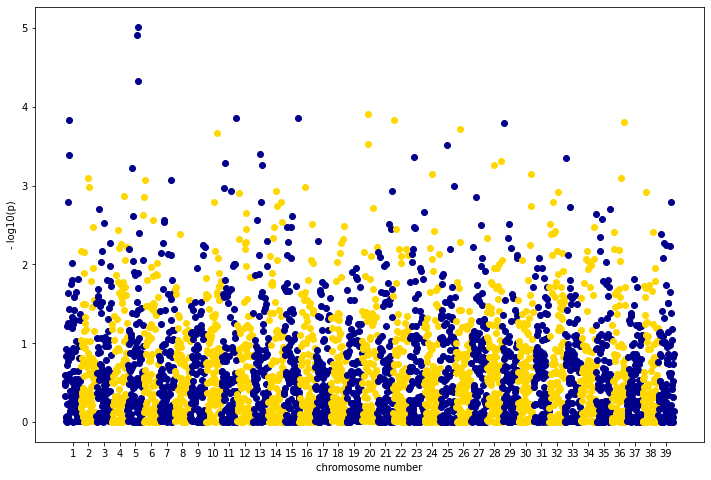

In [18]:
cur_chr = '1'
cur_x = []
cur_y = []
prev_start = 0
xpos = []
xlabel = []

fig, ax = plt.subplots(figsize=(12,8))

for i in range(len(p_values)):
    
    chrm = (list(snp_data.columns)[i]).split(':')[0]
    
    if chrm != cur_chr:
        clr = 'gold' if int(cur_chr)%2 == 0 else 'darkblue'
        ax.plot(cur_x,cur_y, marker='o',linestyle='',color=clr)
        xpos.append(int((prev_start+i)/2))
        xlabel.append(cur_chr)
        cur_chr = chrm
        cur_x = []
        cur_y = []
        prev_start = i

    cur_x.append(i)
    cur_y.append(-np.log10(p_values[i]))

clr = 'gold' if int(cur_chr)%2 == 0 else 'darkblue'
ax.plot(cur_x,cur_y, marker='o',linestyle='',color=clr)
xpos.append(int((prev_start+i)/2))
xlabel.append(cur_chr)
plt.xticks(xpos, xlabel)
plt.xlabel('chromosome number')
plt.ylabel('- log10(p)')
plt.show()    

Notice that there are multiple SNPs in chromosome 5 and they are close to each other.
In fact, these SNPs are on the MC1R gene (https://www.ncbi.nlm.nih.gov/gene/489652), which plays a role in skin/fur pigmentation.